
#### SVM - Support Vector Machine from scratch


$$
    w \cdot x_{i} - b \ge 1 \text{ if } y_{i}=1 \\
    w \cdot x_{i} - b \le -1 \text{ if } y_{i}=-1 \\ \\
    y_{i} \left(w \cdot x_{i} - b \right) \ge 1 \\ \\
$$

<br />

$$
    \text{ with } y \in {-1,1}
$$

In [18]:
import numpy as np

In [19]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # Init wights and biases
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for index, x_i in enumerate(X):
                condition = y_[index] * (np.dot(x_i, self.weight) - self.bias) >= 1
                if condition:
                    self.weight -= self.learning_rate * (2 * self.lambda_param * self.weight)
                else:
                    self.weight -= self.learning_rate * (2 * self.lambda_param * self.weight - np.dot(x_i, y_[index]))
                    self.bias -= self.learning_rate * y_[index]

    def predict(self, X):
        approx = np.dot(X, self.weight) - self.bias
        return np.sign(approx)

In [20]:
# Test using scikit-learn dataset
if __name__ == "__main__":
    # imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )

    y = np.where(y == 0, -1, 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    clf = SVM()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_predicted):
        accuracy = np.sum(y_true == y_predicted) / len(y_true)
        return accuracy
    
    print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


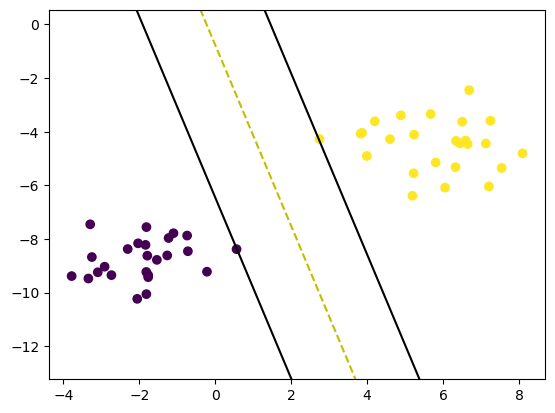

In [22]:
def vizualize_svm():
    def get_hyperpane_value(x, weight, bias, offset):
        return (-weight[0] * x + bias + offset) / weight[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperpane_value(x0_1, clf.weight, clf.bias, 0)
    x1_2 = get_hyperpane_value(x0_2, clf.weight, clf.bias, 0)

    x1_1_m = get_hyperpane_value(x0_1, clf.weight, clf.bias, -1)
    x1_2_m = get_hyperpane_value(x0_2, clf.weight, clf.bias, -1)

    x1_1_p = get_hyperpane_value(x0_1, clf.weight, clf.bias, 1)
    x1_2_p = get_hyperpane_value(x0_2, clf.weight, clf.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

vizualize_svm()